# Análisis de las ventas de cerveza en una cadena de supermercados

### Descripción del problema

En el siguiente análisis vamos a estudiar las ventas de cervezas en una cadena de supermercados durante el mes de Junio de 2018. Para ello contamos con dos ficheros de entrada:

* `master_articles.h5`: contiene la información del maestro de articulos. Tiene los siguientes campos:
 * `Articulo_Codigo` : identificador único del artículo
 * `Articulo_Nombre` : nombre del articulo
 * `GVSV`: categoría a la que pertenece el artículo (cervezas, bebidas refrescantes, café, etc.)
* `beer_sales.h5`: contiene todos los tickets de venta de cervezas (a nivel de línea de ticket). Tiene los siguientes campos:
 * `articulo`: identificador único del artículo comprado
 * `cantidad`: unidades compradas de ese artículo en el ticket
 * `importe`: importe en euros de ese artículo en el ticket
 * `tienda`: identificador único de la tienda donde se produjo la linea de ticket
 * `caja`: identificador de la caja registradora en la que se produjo la linea de ticket
 * `dia`: dia en el que se produjo la linea de ticket
 * `hora`: hora en la que se produjo la linea de ticket
 * `minuto`: minuto en el que se produjo la linea de ticket
 * `ticket`: identificador NO único del ticket (es un identificador del ticket por tienda y caja)

### Desarrollo de la solución

En primer lugar, nos gustaría traernos el nombre de cada artículo al dataset de tickets.

In [4]:
import pandas as pd

# Primero cargamos con Pandas los datos del master_articles y de beer_sales
master_articles = pd.read_hdf('data/master_articles.h5')
beer_sales = pd.read_hdf('data/beer_sales.h5')

# Hacemos un join de ambos df en base al campo 'articulo'
beer_sales_with_names = pd.merge(beer_sales, master_articles, left_on='articulo', right_on='Articulo_Codigo', how='left')

#Ahora eliminamos las columnas GVSV y Articulo_Codigo ya que no son necesarias
beer_sales_with_names.drop(columns=['Articulo_Codigo', 'GVSV'], inplace=True)

# Mostramos un head del resultado
beer_sales_with_names.head(10)


,articulo,caja,cantidad,dia,hora,importe,minuto,ticket,tienda,Articulo_Nombre
0,19519,3,1.0,23,13,6.12,19,137,14808,SAN MIGUEL 12X33cl.
1,19519,3,1.0,29,11,6.12,52,78,14808,SAN MIGUEL 12X33cl.
2,7571,2,6.0,30,18,3.90,37,310,14967,ESTR.GALICIA 33cl.
3,8128,3,1.0,5,13,0.00,44,57,14214,MOLENBIER 33cl.
4,13340,3,1.0,5,13,0.00,44,57,14214,SKOL 33cl.
5,13340,5,1.0,2,12,0.00,2,38,14802,SKOL 33cl.
6,8128,6,1.0,5,9,0.00,49,22,14802,MOLENBIER 33cl.
7,8128,2,1.0,8,11,0.00,36,69,14097,MOLENBIER 33cl.
8,8128,4,1.0,2,14,0.00,35,70,14202,MOLENBIER 33cl.
9,8128,2,24.0,19,17,6.00,29,256,14202,MOLENBIER 33cl.


Como se ha explicado en la descripción del problema, el campo `ticket` del dataset de ventas no es único. Es decir, puede haber líneas de ticket que compartan valor de `ticket` sin pertenecer necesariamente al mismo ticket. Dada la información disponible, ¿se te ocurre alguna manera de generar un id de ticket que identifique unequívocamente las lineas que pertenecen a un mismo ticket?

<span style="color:grey"> Puesto que el campo ticket no es único y puede haber rows que compartan el mismo valor de ticket sin pertenecer al mismo ticket realmente, necesitamos generar una nueva variable que nos permita generar un identificador único para cada ticket. Una buena estrategia puede ser generar una nueva columna que sea combinación de varias variables ya existentes para así poder garantizar su unicidad. 

<span style="color:grey"> En este caso vamos a generar una columna llamada id_ticket que concatene los campos 'tienda', 'caja', 'ticket' y 'dia', ya que nos asegura que cada identificador resultante sea único para cada combinación de tienda, caja, ticket y dia. Con esta combinación podemos garantizar que el valor de ticket_id será único para cada compra. </span>

In [5]:
# Creamos el campo 'id_ticket' concatenando 'tienda', 'caja' y 'ticket' en una copia de nuestro df original
beer_names_with_ID = beer_sales_with_names.copy()
beer_names_with_ID['id_ticket'] = beer_names_with_ID['tienda'].astype(str) + '_' + beer_names_with_ID['caja'].astype(str) + '_' + beer_names_with_ID['ticket'].astype(str) + '_' + beer_names_with_ID['dia'].astype(str)
beer_names_with_ID.head(10)

,articulo,caja,cantidad,dia,hora,importe,minuto,ticket,tienda,Articulo_Nombre,id_ticket
0,19519,3,1.0,23,13,6.12,19,137,14808,SAN MIGUEL 12X33cl.,14808_3_137_23
1,19519,3,1.0,29,11,6.12,52,78,14808,SAN MIGUEL 12X33cl.,14808_3_78_29
2,7571,2,6.0,30,18,3.90,37,310,14967,ESTR.GALICIA 33cl.,14967_2_310_30
3,8128,3,1.0,5,13,0.00,44,57,14214,MOLENBIER 33cl.,14214_3_57_5
4,13340,3,1.0,5,13,0.00,44,57,14214,SKOL 33cl.,14214_3_57_5
5,13340,5,1.0,2,12,0.00,2,38,14802,SKOL 33cl.,14802_5_38_2
6,8128,6,1.0,5,9,0.00,49,22,14802,MOLENBIER 33cl.,14802_6_22_5
7,8128,2,1.0,8,11,0.00,36,69,14097,MOLENBIER 33cl.,14097_2_69_8
8,8128,4,1.0,2,14,0.00,35,70,14202,MOLENBIER 33cl.,14202_4_70_2
9,8128,2,24.0,19,17,6.00,29,256,14202,MOLENBIER 33cl.,14202_2_256_19


¿Se te ocurre alguna manera de verificar que el identificador generado agrupa correctamente las líneas de ticket? ¿Qué consecuencias crees que podría tener el no generarlo correctamente?

<span style="color:grey"> Las consecuencias de no generar correctamente el identificador son la pérdida de información de ventas individuales y la la dificultad para realizar análisis precisos sobre los patrones de compra. Esto podría repercutir negativamente en la capacidad de la empresa para tomar decisiones sobre inventario, campañas de marketing....



Ahora, nos gustaría ver en un gráfico las ventas por articulo del TOP 10 de cervezas más vendidas.

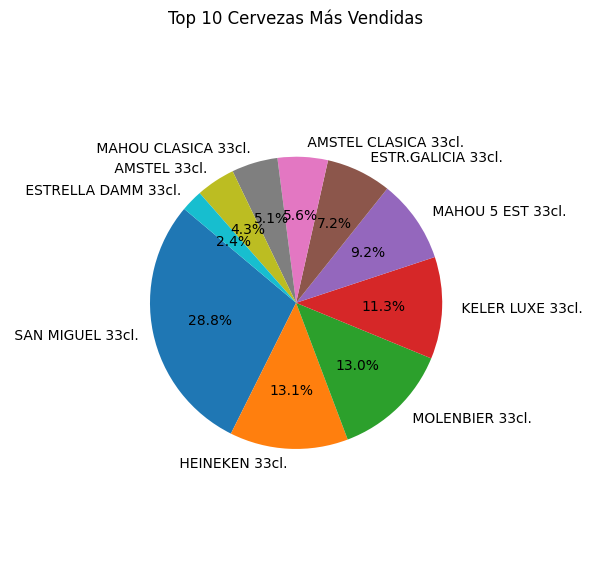

In [6]:
import matplotlib.pyplot as plt

# Calculamos las ventas totales de cada artículo de cerveza
beer_sales_by_article = beer_sales_with_names.groupby('Articulo_Nombre')['cantidad'].sum()

# Seleccionamos los 10 artículos de cerveza más vendidos
top_10_beers = beer_sales_by_article.nlargest(10)

# Configuramos el pie plot
plt.figure(figsize=(6, 6))
plt.pie(top_10_beers, labels=top_10_beers.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Cervezas Más Vendidas')

# Mostramos el gráfico
plt.axis('equal')  # Para que el gráfico sea circular
plt.tight_layout()
plt.savefig('outputs/Top_10_cervezas.png')
plt.show()



Se han detectado una serie de tickets anómalos en los que la cantidad de cervezas compradas es extremadamente alto. ¿Como harías para detectarlos y filtrarlos de nuestro conjunto de ventas?

<span style="color:grey"> Para detectar y filtrar los tickets anómalos en donde la cantidad de cervezas compradas es extremdamente alta se pueden utilizar técnicas de detección de outliers. Una forma común de realizar esto calcular estadísticas descriptivas sobre la cantidad de cervezas compradas y luego identificar los tickets que están significativamente por encima de ciertos umbrales.


<span style="color:grey"> Usualmente se calcula la media y la desviación estándar para esto, considerando como anómalos los tickets cuya cantidad de cervezas está más de ciertos múltiplos de la desviación estándar por encima de la media. Usualmente se utiliza una desviación estándar de 3 para considerar outliers. Un ejemplo empleando código con Python sería:

In [7]:
# Calculamos la media y la desviación estándar de la cantidad de cervezas compradas
numero_desviaciones = 3
mean = beer_sales_with_names['cantidad'].mean()
std = beer_sales_with_names['cantidad'].std()

# Definimos el umbral para identificar los tickets anómalos (por ejemplo, 3 desviaciones estándar por encima de la media)
threshold = mean + numero_desviaciones * std

# Filtramos los tickets anómalos
anomalous_tickets = beer_sales_with_names[beer_sales_with_names['cantidad'] > threshold]
anomalous_tickets

,articulo,caja,cantidad,dia,hora,importe,minuto,ticket,tienda,Articulo_Nombre
118,10486,3,48.0,15,14,23.52,16,6,14316,KELER LUXE 33cl.
161,7643,3,49.0,22,18,28.91,15,334,14033,HEINEKEN 33cl.
543,10486,2,48.0,15,16,24.00,0,237,14824,KELER LUXE 33cl.
1164,52527,3,56.0,27,11,28.56,17,58,14801,CRUZCAMPO 33cl.
1588,7643,3,56.0,16,11,35.28,22,15,14950,HEINEKEN 33cl.
...,...,...,...,...,...,...,...,...,...,...
44253,12814,1,48.0,23,9,29.76,28,1,14973,MAHOU 5 EST 33cl.
45652,10486,1,96.0,2,11,47.04,4,5,14980,KELER LUXE 33cl.
45661,7643,4,48.0,1,13,30.24,3,104,14068,HEINEKEN 33cl.
45750,7643,2,50.0,7,12,22.50,13,30,14313,HEINEKEN 33cl.


¿Se te ocurre alguna manera de automáticamente detectar estos tickets en el futuro? ¿Y algún motivo de su presencia?

<span style="color:grey">Una forma de automatizar el proceso es crear una función que filtre nuestro df de forma automática, pasando como argumentos el df y el nombre de la columna. 

<span style="color:grey">El motivo de su presencia es que son compras de alto volumen de artículos. Una posible explicación puede ser que algunos minoristas (restaurantes pequeños) compren las cervezas de sus establecimientos en supermercados, al carecer de otra cadena de suministro.

In [8]:
def detect_anomalous_tickets(df, column):
    """
    Funcion que detecta tickets anómalos basados en la desviación estándar.

    Args:
    - df: DataFrame que contiene los datos de los tickets.
    - column: Nombre de la columna que contiene la variable a analizar, debe pasarse como str.

    Returns:
    - DataFrame: DataFrame que contiene solo los tickets anómalos.
    """

    # Calcular la media y la desviación estándar
    mean = df[column].mean()
    std = df[column].std()

    # Definir el límite superior para identificar valores atípicos
    umbral = mean + 3 * std

    # Filtrar los tickets anómalos
    anomalous_tickets = df[df[column] > umbral]

    return anomalous_tickets

detect_anomalous_tickets(beer_sales_with_names, "cantidad")

,articulo,caja,cantidad,dia,hora,importe,minuto,ticket,tienda,Articulo_Nombre
118,10486,3,48.0,15,14,23.52,16,6,14316,KELER LUXE 33cl.
161,7643,3,49.0,22,18,28.91,15,334,14033,HEINEKEN 33cl.
543,10486,2,48.0,15,16,24.00,0,237,14824,KELER LUXE 33cl.
1164,52527,3,56.0,27,11,28.56,17,58,14801,CRUZCAMPO 33cl.
1588,7643,3,56.0,16,11,35.28,22,15,14950,HEINEKEN 33cl.
...,...,...,...,...,...,...,...,...,...,...
44253,12814,1,48.0,23,9,29.76,28,1,14973,MAHOU 5 EST 33cl.
45652,10486,1,96.0,2,11,47.04,4,5,14980,KELER LUXE 33cl.
45661,7643,4,48.0,1,13,30.24,3,104,14068,HEINEKEN 33cl.
45750,7643,2,50.0,7,12,22.50,13,30,14313,HEINEKEN 33cl.


A continuación, nos gustaría analizar qué cervezas se compran juntas más a menudo. Para ello, a partir de los tickets, calcularemos el número de veces que se compran cada par de articulos conjuntamente (en el mismo ticket).

In [9]:
from itertools import combinations

# Agrupamos las líneas de ticket por el identificador único de ticket
ticket_groups = beer_names_with_ID.groupby('id_ticket')['Articulo_Nombre']

# Creamos un dic vacío para almacenar la frecuencia de cada par de artículos
pairs_frequency = {}

# Iteramos sobre cada grupo de ticket
for ticket_id, group in ticket_groups:
    # Obtenemos todos los pares de artículos únicos en el ticket
    unique_pairs = group.unique()
    # Generamos todas las combinaciones posibles de pares de artículos
    pairs_combinations = combinations(unique_pairs, 2)
    # Actualizamos la frecuencia de cada par de artículos en el diccionario
    for pair in pairs_combinations:
        # Ordenamos alfabéticamente los nombres de los artículos en el par #NOTA: Si no realizamos esto obtenemos casos como ( SKOL 33cl., MOLENBIER 33cl.)	138	( MOLENBIER 33cl., SKOL 33cl.)	137. (SON LO MISMO !)

        pair = tuple(sorted(pair))
        pairs_frequency[pair] = pairs_frequency.get(pair, 0) + 1

# Convertimos el diccionario de frecuencias en un DataFrame
pairs_df = pd.DataFrame(list(pairs_frequency.items()), columns=['Pair', 'Frequency'])

# Definimos un umbral de frecuencia para filtrar los pares de artículos
umbral_frecuencia = 5  # Este valor se puede modificar en función de los requerimientos de cada situación

# Aplicamos el filtro y ordenamos de menor a mayor. Por último nos quedamos con las 10 combinaciones más repetidas.
pares_frecuentes_df = pairs_df[pairs_df['Frequency'] >= umbral_frecuencia].sort_values(by='Frequency', ascending=False)
pares_frecuentes_df.head(10)


,Pair,Frequency
2,"( MOLENBIER 33cl., SKOL 33cl.)",275
18,"( SAN MIGUEL 33cl., SAN MIGUEL 50cl.)",95
9,"( HEINEKEN 33cl., SAN MIGUEL 33cl.)",74
11,"( MOLENBIER 33cl., SAN MIGUEL 33cl.)",67
0,"( KELER LUXE 33cl., SAN MIGUEL 33cl.)",59
14,"( MOLENBIER 33cl., MOLENBIER100%MALT 33cl.)",51
1,"( HEINEKEN 33cl., KELER LUXE 33cl.)",48
61,"( MAHOU 5 EST 33cl., MAHOU CLASICA 33cl.)",41
46,"( ESTR.GALICIA 33cl., MOLENBIER 33cl.)",40
36,"( ESTR.GALICIA 33cl., SAN MIGUEL 33cl.)",35


¿Se te ocurre alguna posible manera de optimizar este cálculo?

 <span style="color:grey">1.- Crear un diccionario vacío y anexar elementos uno a uno no es la forma más eficiente para este tipo de estructuras. Se puede usar 'defaultdict' del módulo 'collections' que es más eficiente tanto en tiempo de ejecución como en gestión de memoria.

<span style="color:grey">2.- Reducir el número de combinaciones generadas. Limitar las combinaciones a solo los pares de artículos que aparecen juntos, AL MENOS, cinco veces (Este parámetro depende de las necesidades de negocio).

<span style="color:grey">3.- Paralelizar el cálculo. Si aún a pesar de todo el tiempo de ejecución sigue siendo muy elevado, se puede emplear PySpark para paralelizar el cálculo y acelerar el proceso.


In [10]:
#Aqui un código aplicando los dos primeros puntos:

from collections import defaultdict

def encontrar_pares_frecuentes_optimizado(df, umbral_frecuencia=5, top_n=10):
    """
    Función que encuentra los pares de artículos más frecuentes en los tickets.

    Args:
        df (DataFrame): DataFrame que contiene las ventas de cervezas con los identificadores de ticket.
        umbral_frecuencia (int): Umbral mínimo de frecuencia para considerar un par de artículos como frecuente. Por defecto el valor es 5.
        top_n (int): Número de combinaciones más frecuentes que se deben devolver. Por defecto el valor es 10.

    Returns:
        DataFrame: DataFrame con los pares de artículos más frecuentes y su frecuencia.
    """

    # Usamos defaultdict para almacenar la frecuencia de cada par de artículos
    pairs_frequency = defaultdict(int)

    # Iteramos sobre cada grupo de ticket
    for ticket_id, group in ticket_groups:
        # Obtenemos todos los pares de artículos únicos en el ticket
        unique_pairs = group.unique()
        # Generamos todas las combinaciones posibles de pares de artículos
        pairs_combinations = combinations(unique_pairs, 2)
        # Actualizamos la frecuencia de cada par de artículos en el diccionario
        for pair in pairs_combinations:
            # Ordenamos alfabéticamente los nombres de los artículos en el par #NOTA: Si no realizamos esto obtenemos cosas como ( SKOL 33cl., MOLENBIER 33cl.)	138	( MOLENBIER 33cl., SKOL 33cl.)	137.

            pair = tuple(sorted(pair))
            pairs_frequency[pair] = pairs_frequency.get(pair, 0) + 1


    # Convertimos el diccionario de frecuencias en un DataFrame
    pairs_df = pd.DataFrame(list(pairs_frequency.items()), columns=['Pair', 'Frequency'])

    # Filtramos los pares de artículos por umbral de frecuencia
    pares_frecuentes_df = pairs_df[pairs_df['Frequency'] >= umbral_frecuencia]

    # Ordenamos de mayor a menor frecuencia y obtenemos las N combinaciones más frecuentes
    pares_frecuentes_top_n = pares_frecuentes_df.sort_values(by='Frequency', ascending=False).head(top_n)
    
    return pares_frecuentes_top_n

# Llamar a la función con el DataFrame 'beer_names_with_ID' y los parámetros deseados
pares_frecuentes_optimizado = encontrar_pares_frecuentes_optimizado(beer_names_with_ID, umbral_frecuencia=5, top_n=10)
pares_frecuentes_optimizado

,Pair,Frequency
2,"( MOLENBIER 33cl., SKOL 33cl.)",275
18,"( SAN MIGUEL 33cl., SAN MIGUEL 50cl.)",95
9,"( HEINEKEN 33cl., SAN MIGUEL 33cl.)",74
11,"( MOLENBIER 33cl., SAN MIGUEL 33cl.)",67
0,"( KELER LUXE 33cl., SAN MIGUEL 33cl.)",59
14,"( MOLENBIER 33cl., MOLENBIER100%MALT 33cl.)",51
1,"( HEINEKEN 33cl., KELER LUXE 33cl.)",48
61,"( MAHOU 5 EST 33cl., MAHOU CLASICA 33cl.)",41
46,"( ESTR.GALICIA 33cl., MOLENBIER 33cl.)",40
36,"( ESTR.GALICIA 33cl., SAN MIGUEL 33cl.)",35


¿Qué utilidad crees que puede tener esta información?

<span style="color:grey"> Conocer los artículos que más se venden puede ser de gran ayuda para:

<span style="color:grey"> 1.- Realizar cross-selling: Identificar estos productos que se suelen comprar juntos puede ayudar a desarrollar estrategias de cross-selling en las cuales se promocionan productos adicionales al cliente durante su compra. Un ejemplo sería descubrir que, junto a las cervezas, se compran aceitunas o patatas fritas de bolsa.

<span style="color:grey">2.- Gestión de inventario: y espacio en un supermercado: Conocer las combinaciones de productos que más se compran juntos habitualmente ayuda a gestionar inventarios y pedidos, o si no ponerlos en la misma sección de un supermercado para favorecer que el cliente compre ambos (si ya ha visto uno y hay gran correlación de compras, es muy probable que compre el otro)

<span style="color:grey">3.- Ofertas personalizadas: Gracias a estas correlaciones se pueden realizar promociones y ofertas mucho más efectiva. Si sabemos que un producto A se suele comprar junto a un producto B se puede ofrecer un descuento en B si se ha comprado A.


Por último, nos gustaría ver como evoluciona la venta de cervezas a lo largo de la semana y por tramos horarios. ¿Podrías representar esto en un único gráfico? ¿Qué utilidad de negocio crees que tendría esta información segmentada?

<span style="color:grey">OPCIÓN 1: Plotly (gráfico interactivo)

In [11]:
#Agrupamos y contamos según el día del mes
conteo_por_dia = beer_sales_with_names.groupby('dia').size().reset_index(name='ventas')
# Convertimos la columna "dia" a enteros y ordenamos de menor a mayor
conteo_por_dia['dia'] = conteo_por_dia['dia'].astype(int)
conteo_por_dia = conteo_por_dia.sort_values(by='dia')
#Ahora agrupamos y contamos según la hora
conteo_por_hora = beer_sales_with_names.groupby('hora').size().reset_index(name='ventas')
# Convertimos la columna "hora" a enteros y ordenamos de menor a mayor
conteo_por_hora['hora'] = conteo_por_hora['hora'].astype(int)
conteo_por_hora = conteo_por_hora.sort_values(by='hora')

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot

trace1 = {
    'x': conteo_por_dia.dia,
    'y': conteo_por_dia.ventas,
    'name': 'citation',
    'type': 'bar'

}

trace2 = {
    'x': conteo_por_hora.hora,
    'y': conteo_por_hora.ventas,
    'name': 'teaching',
    'type': 'bar'

}

data = [trace1, trace2]

layout  = {
    'xaxis': {'title': 'Top 3 unis'},
    'barmode': 'group',
    'title': 'Citations and teaching top 3 unis'

}


fig = go.Figure(data = data, layout = layout)
iplot(fig)

<span style="color:grey">Opción 2: Matplotlib

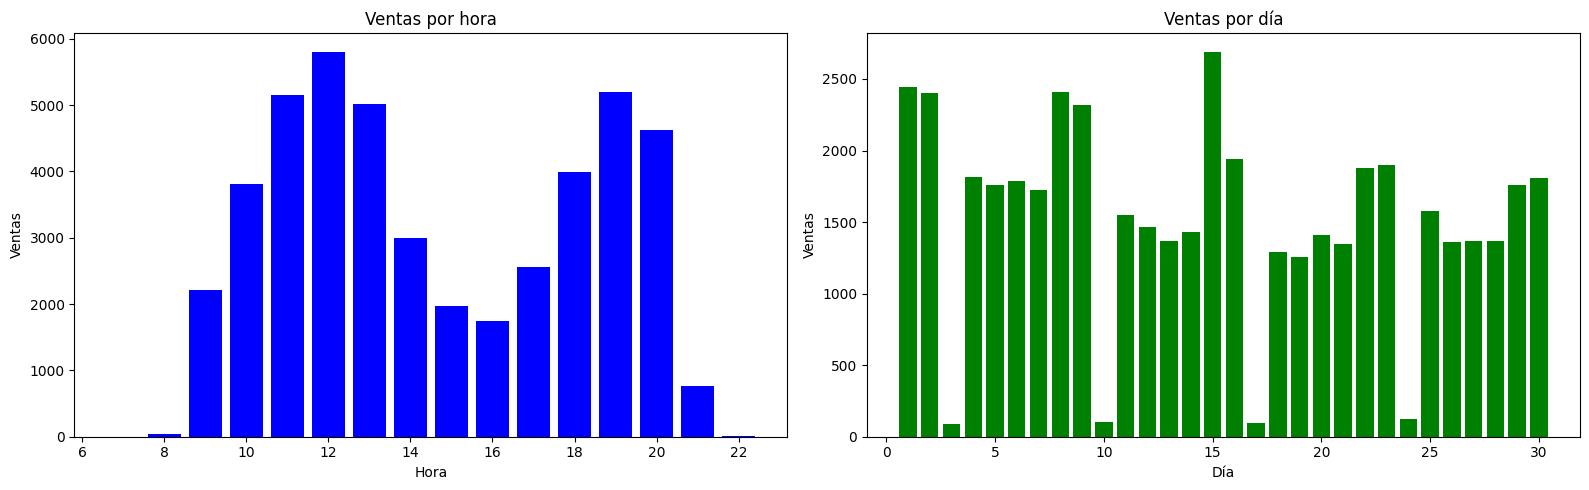

In [12]:
# Configuración de la figura y los subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Gráfico para conteo_por_hora
ax1.bar(conteo_por_hora['hora'], conteo_por_hora['ventas'], color='blue')
ax1.set_title('Ventas por hora')
ax1.set_xlabel('Hora')
ax1.set_ylabel('Ventas')

# Gráfico para conteo_por_dia
ax2.bar(conteo_por_dia['dia'], conteo_por_dia['ventas'], color='green')
ax2.set_title('Ventas por día')
ax2.set_xlabel('Día')
ax2.set_ylabel('Ventas')

# Mostrar el gráfico
plt.tight_layout()
plt.savefig('outputs/ventas_dia_y_hora.png')
plt.show()


¿Qué usos de Machine Learning verías aplicables a este conjunto de datos?

<span style="color:grey">Este DataSet posee información muy útil sobre las ventas totales de cerveza en función de varios parámetros. Puesto que la columna importe es la más importante desde un punto de vista de negocio (interesa aumentar las ventas al máximo) se puede utilizar como columna de target para aplicar varios modelos supervisados de ML:

<span style="color:grey">-Modelos de clasificación: Emplear algunos modelos de clasificación como SVM, KNN, Random Forest o Regresión Logística para predecir grandes volúmenes de ventas. Para este fin se clasificaría como 0 compras pequeñas y como 1 compras de un elevado importe (por encima de cierto umbral)

<span style="color:grey">-Modelos de regresión: Emplear algunos modelos de regresión como una regresión lineal -o polinomial- para predecir el total de ventas de una tienda en un día, o durante un periodo de horas.


<span style="color:grey">Algunos modelos no supervisados que también se podrian emplear son la clusterización, utilizando algoritmos como KMeans o DBSCAN para clusterizar a los clientes. Esta clusterización puede ser de gran utilidad para segmentar a nuestros clientes -gente que entra a comprar pronto y lo hace en pequeñas cantidades, o gente que compra a principios de mes y realiza un elevado gasto económico-. Esta información es clave para un departamento de marketing o de gestión de ventas, ya que les permite conocer más en profundidad a los consumidores habituales y las futuras estrategias de negocio pueden ir mejor orientadas -data driven decissions-.